# Image Cropping

Here's a Jupyter Notebook code that will go through all images in a specified folder, crop them to a specified size, and save them in a new folder. Additionally, it will display a few of the cropped samples in the output for you to view.

Make sure you have Pillow (PIL) and matplotlib installed. If you don't have them, you can install them via pip:

In [ ]:
pip install pillow matplotlib


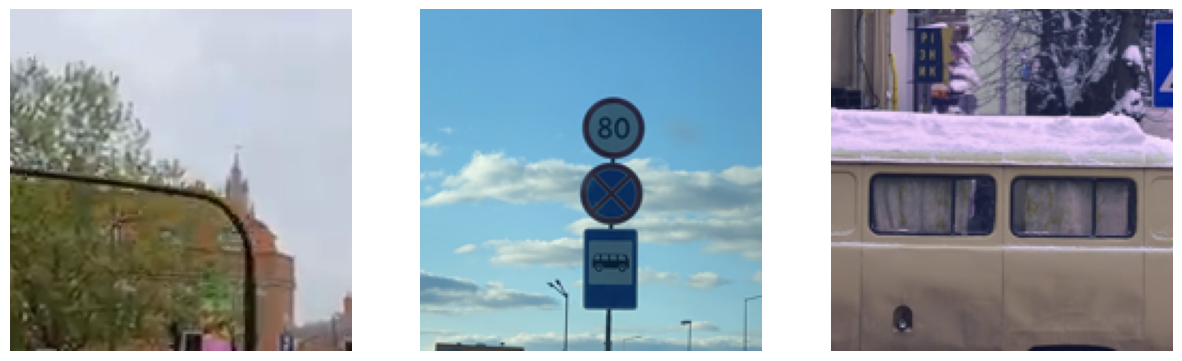

In [2]:
# Import required libraries
import os
from PIL import Image
import matplotlib.pyplot as plt

# Function to crop and save images with optional crop_x and crop_y
def crop_images(input_folder, output_folder, crop_size, show_samples=3, crop_x=None, crop_y=None):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    sample_images = []
    
    for idx, image_file in enumerate(image_files):
        img_path = os.path.join(input_folder, image_file)
        img = Image.open(img_path)
        width, height = img.size

        # Determine crop position
        if crop_x is not None and crop_y is not None:
            left = crop_x
            top = crop_y
        else:
            left = (width - crop_size[0]) / 2
            top = (height - crop_size[1]) / 2

        # Ensure crop box is within image bounds
        left = max(0, min(left, width - crop_size[0]))
        top = max(0, min(top, height - crop_size[1]))
        right = left + crop_size[0]
        bottom = top + crop_size[1]

        cropped_img = img.crop((left, top, right, bottom))
        cropped_img_path = os.path.join(output_folder, image_file)
        cropped_img.save(cropped_img_path)

        if idx < show_samples:
            sample_images.append(cropped_img)
        
    return sample_images

# Parameters
input_folder = 'inputs'  # Replace with your input folder path
output_folder = 'outputs'  # Replace with your output folder path
crop_size = (160, 160)  # Specify the desired crop size (width, height)
crop_x = None           # Set to an integer for custom X, or None for center
crop_y = None           # Set to an integer for custom Y, or None for center

# Crop images and get the first few samples
cropped_samples = crop_images(input_folder, output_folder, crop_size, show_samples=3, crop_x=crop_x, crop_y=crop_y)

# Display the first few cropped images
fig, axes = plt.subplots(1, len(cropped_samples), figsize=(15, 5))
for i, img in enumerate(cropped_samples):
    axes[i].imshow(img)
    axes[i].axis('off')
plt.show()
